In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import pylab
from scipy import misc
from skimage.feature import local_binary_pattern
from skimage.feature import canny
from skimage import io
from skimage import color


##Moffin or Dog?
<img align="center" style="padding-right:10px;" src="https://github.com/camargoj/datasets/blob/master/dogOrMuffin.jpg?raw=1">
<br>


---


#Taller
Cree un notebook que compare de forma cuantitativa las imágenes que se encuentran en esta carpeta (img1.png, img2.png e img3.png). 

Puede utilizar la distancia euclídea o cualquier medida de distancia.

<img align="center" style="padding-right:10px;" src="https://github.com/camargoj/datasets/blob/master/img1.png?raw=1">
<img align="center" style="padding-right:10px;" src="https://github.com/camargoj/datasets/blob/master/img2.png?raw=1">
<img align="center" style="padding-right:10px;" src="https://github.com/camargoj/datasets/blob/master/img3.png?raw=1">

https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy

#Imágenes en Gris

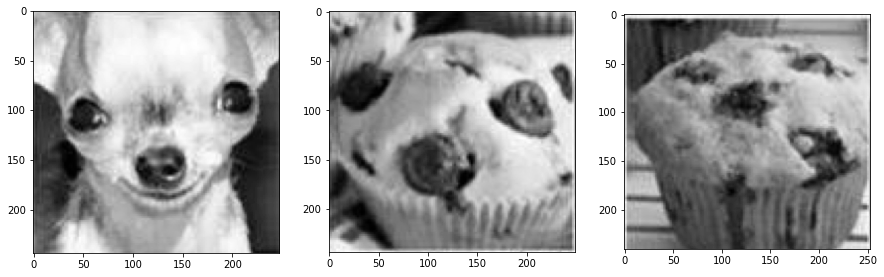

In [2]:
fig= plt.figure(figsize=(15,5))

#Imágen 1
img = cv2.imread('img1.png')

R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000

plt.subplot(1,3,1)
img_gray_img1 = img_gray.astype('int32')
plt.imshow(img_gray_img1, cmap = plt.get_cmap('gray'))

#Imagen 2
img = cv2.imread('img2.png')

R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
img_gray2 = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000

plt.subplot(1,3,2)
img_gray_img2 = img_gray2.astype('int32')
plt.imshow(img_gray_img2, cmap = plt.get_cmap('gray'))

#Imágen 3
img = cv2.imread('img3.png')

R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
img_gray3 = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000

plt.subplot(1,3,3)
img_gray_img3 = img_gray3.astype('int32')
plt.imshow(img_gray_img3, cmap = plt.get_cmap('gray'))


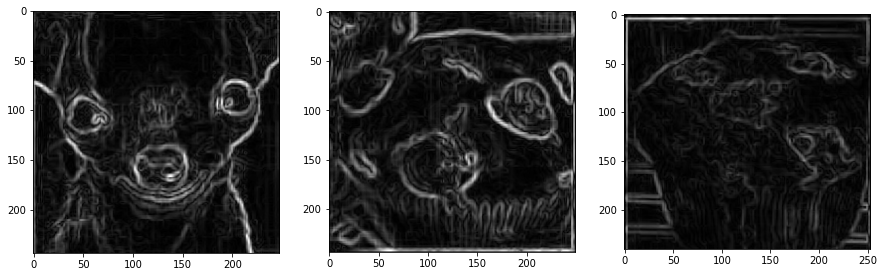

In [3]:
fig= plt.figure(figsize=(15,5))
#Imagen 1
dx = scipy.ndimage.sobel(img_gray_img1, 0)  # derivada horizontal
dy = scipy.ndimage.sobel(img_gray_img1, 1)  # derivada vertical
mag = np.hypot(dx, dy)  # magnitud
mag *= 255.0 / np.max(mag)  # normalización
plt.subplot(1,3,1)
plt.imshow(mag, cmap = plt.get_cmap('gray'))


dx = scipy.ndimage.sobel(img_gray_img2, 0)  # derivada horizontal
dy = scipy.ndimage.sobel(img_gray_img2, 1)  # derivada vertical
mag2 = np.hypot(dx, dy)  # magnitud
mag2 *= 255.0 / np.max(mag2)  # normalización

plt.subplot(1,3,2)
plt.imshow(mag2, cmap = plt.get_cmap('gray'))



dx = scipy.ndimage.sobel(img_gray_img3, 0)  # derivada horizontal
dy = scipy.ndimage.sobel(img_gray_img3, 1)  # derivada vertical
mag3 = np.hypot(dx, dy)  # magnitud
mag3 *= 255.0 / np.max(mag3)  # normalización
plt.subplot(1,3,3)
plt.imshow(mag3, cmap = plt.get_cmap('gray'))


# Histogramas Primera Imagen

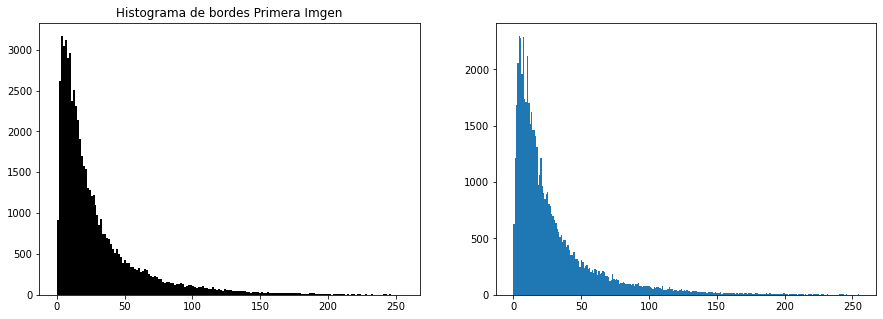

In [4]:
fig= plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(mag.ravel(), bins='auto', color="black")  # arguments are passed to np.histogram
plt.title("Histograma de bordes Primera Imgen")


plt.subplot(1,2,2)
(n, bins, patches) = plt.hist(mag.ravel(), bins=256, label='hst')

In [5]:
distancia_img1=n
#print(distancia_img1)

# Histogramas Segunda Imagen

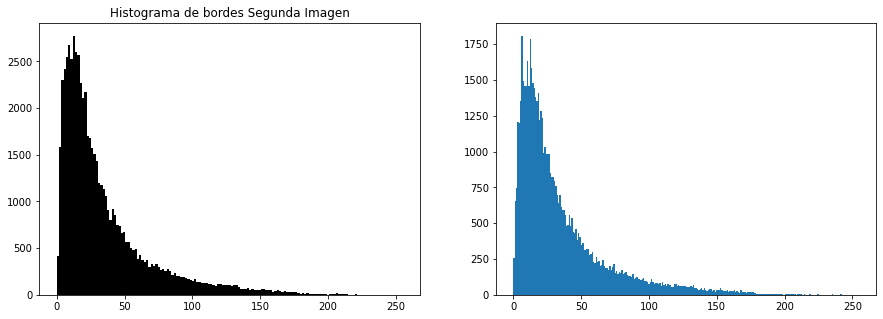

In [6]:
fig= plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(mag2.ravel(), bins='auto', color="black")  # arguments are passed to np.histogram
plt.title("Histograma de bordes Segunda Imagen")

plt.subplot(1,2,2)
(n2, bins, patches) = plt.hist(mag2.ravel(), bins=256, label='hst')

In [7]:
distancia_img2=n2
#print(distancia_img2)

# Histogramas Tercera Imagen

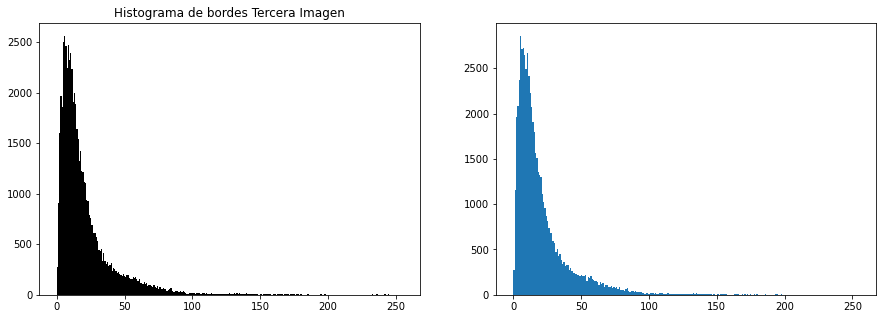

In [8]:
fig= plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(mag3.ravel(), bins='auto', color="black")  # arguments are passed to np.histogram
plt.title("Histograma de bordes Tercera Imagen")


plt.subplot(1,2,2)
(n3, bins, patches) = plt.hist(mag3.ravel(), bins=256, label='hst')

In [9]:
distancia_img3=n3
#print(distancia_img3)

#Distancia Euclidiana entre las Imágenes

In [17]:
dist1 = np.linalg.norm(n-n2)
print(f'Distancia entre la Primera y Segunda Imagen: {dist1}')
dist2 = np.linalg.norm(n-n3)
print(f'Distancia entre la Primera y Tercera Imagen: {dist2}')
dist3 = np.linalg.norm(n2-n3)
print(f'Distancia entre la Segunda y Tercera Imagen: {dist3}')


Distancia entre la Primera y Segunda Imagen: 2470.8411523203995
Distancia entre la Primera y Tercera Imagen: 2328.571450482033
Distancia entre la Segunda y Tercera Imagen: 3941.455949265449
